In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

T-shirt/top


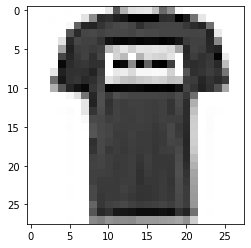

In [3]:
n=1
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Greys');

In [4]:
from tensorflow.keras.utils import to_categorical

In [5]:
y_train = to_categorical(y_train)
y_test_ = to_categorical(y_test)

In [6]:
x_train = x_train/255
x_test = x_test/255

In [7]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

In [9]:
model = Sequential()

In [10]:
model.add(Conv2D(16, (3,3), padding='same', input_shape=(28,28,1), activation = 'relu'))
#output: 28,28,16

In [11]:
model.add(MaxPooling2D(pool_size=(2,2)))
#output: 14,14,16

In [12]:
model.add(Conv2D(32, (3,3), padding='same', activation = 'relu'))
#output: 14,14,32

In [13]:
model.add(MaxPooling2D(pool_size=(2,2)))
#output: 7,7,32

In [14]:
model.add(Conv2D(64, (3,3), padding='same', activation = 'relu'))
#output: 7,7,64

In [15]:
model.add(MaxPooling2D(pool_size=(2,2)))
#output: ?,?,64

In [16]:
model.add(Flatten())
#output: ?*?*64

In [17]:
model.add(Dense(30, activation='relu'))

In [18]:
model.add(Dense(10, activation='softmax'))

In [19]:
model.compile(loss='mse', optimizer=SGD(lr=0.05), metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

### 這裡可以看到，用Max_pooling2d (pool_size=(2,2)) 對於奇數的size而言的輸出結果似乎是向上取整
###  而[這裡](http://hk.uwenku.com/question/p-mzkfyqwq-vw.html)有個可參考的來源
### 具體如何分割，待查證

## Conv2d的參數數= (filter的元素數（權重）＊輸入的channel個數 + 1（filter的偏值）)＊filter的個數 
* $160 = (3*3*1+1)*16$
* $4640 = (3*3*16+1)*32$
* $18496 = (3*3*32+1)*64$
## Flatten output = 元素數＊channel數
* $576 = 3*3*64$

In [21]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [22]:
model.fit(x_train, y_train, batch_size=100, epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 20s 339us/sample - loss: 0.0894 - accuracy: 0.1880
Epoch 2/20
60000/60000 [==============================] - 20s 331us/sample - loss: 0.0878 - accuracy: 0.3721
Epoch 3/20
60000/60000 [==============================] - 20s 334us/sample - loss: 0.0807 - accuracy: 0.4369
Epoch 4/20
60000/60000 [==============================] - 20s 334us/sample - loss: 0.0524 - accuracy: 0.6423
Epoch 5/20
60000/60000 [==============================] - 20s 335us/sample - loss: 0.0389 - accuracy: 0.7289
Epoch 6/20
60000/60000 [==============================] - 20s 335us/sample - loss: 0.0354 - accuracy: 0.7524
Epoch 7/20
60000/60000 [==============================] - 20s 335us/sample - loss: 0.0334 - accuracy: 0.7665
Epoch 8/20
60000/60000 [==============================] - 21s 343us/sample - loss: 0.0315 - accuracy: 0.7812
Epoch 9/20
60000/60000 [==============================] - 20s 338us/sample - loss: 0.0301 - accuracy: 0.7

In [23]:
y_predict = model.predict_classes(x_test)
def showpredict(n):
    print('model預測：',class_names[y_predict[n]])
    print('答案是：',class_names[y_test[n]])
    plt.imshow(x_test[n].reshape(28,28), cmap='Greys');

In [24]:
from ipywidgets import interact_manual

In [25]:
interact_manual(showpredict, n=(0,len(x_test)-1))

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

<function __main__.showpredict(n)>

In [28]:
score = model.evaluate(x_test, y_test_, verbose=0)
print("正確率為：", score[1])

正確率為： 0.84


### verbose = 0 為安靜模式, verbose = 1 為日誌模式
### 參考：https://keras.io/zh/models/model/#evaluate

In [30]:
model.save('4_7my_CNNmodel.h5')